# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
!pip install citipy

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

In [5]:
cities

['pryluky',
 'tevaitoa',
 'victoria',
 'rungata',
 'busselton',
 'ancud',
 'port elizabeth',
 'hobart',
 'bredasdorp',
 'georgetown',
 'atuona',
 'ushuaia',
 'khatanga',
 'dikson',
 'kavieng',
 'la ronge',
 'rikitea',
 'coquimbo',
 'tortoli',
 'belushya guba',
 'kathu',
 'weyburn',
 'pekan',
 'tuatapere',
 'sentyabrskiy',
 'mataura',
 'ribeira grande',
 'riachao',
 'illoqqortoormiut',
 'faanui',
 'ouango',
 'vaini',
 'mys shmidta',
 'grand river south east',
 'dinard',
 'mar del plata',
 'shubarshi',
 'camacha',
 'hilo',
 'vila franca do campo',
 'barrow',
 'berdigestyakh',
 'castro',
 'qaanaaq',
 'fare',
 'kaohsiung',
 'caxito',
 'liverpool',
 'nueva loja',
 'warmbad',
 'hirara',
 'asau',
 'mbandaka',
 'hermanus',
 'albany',
 'saint-philippe',
 'norman wells',
 'punta arenas',
 'makakilo city',
 'kruisfontein',
 'nizhneyansk',
 'bandarbeyla',
 'nuuk',
 'dingle',
 'thompson',
 'jamestown',
 'pangnirtung',
 'meulaboh',
 'pevek',
 'amderma',
 'cape town',
 'bairiki',
 'geraldton',
 'jos'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
requests.get(url + "&q=" + cities[0]).json() 

{'coord': {'lon': 32.3876, 'lat': 50.5932},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 10,
  'feels_like': 1.06,
  'temp_min': 10,
  'temp_max': 10,
  'pressure': 1027,
  'humidity': 92,
  'sea_level': 1027,
  'grnd_level': 1010},
 'visibility': 10000,
 'wind': {'speed': 5.41, 'deg': 86},
 'clouds': {'all': 71},
 'dt': 1615439517,
 'sys': {'country': 'UA', 'sunrise': 1615435992, 'sunset': 1615477675},
 'timezone': 7200,
 'id': 696108,
 'name': 'Pryluky',
 'cod': 200}

In [7]:
# Set variables to empty list
city_name = []
lat = []
lng = []
temp = []
humidity = []
cloudiness = []
wind = []
country = []
date = []

In [8]:
# call weather map API with URL
set_count = 0
record_count = 0
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

print("Beginning Data Retrieval ")
print("-----------------------------")

# Iterate over the all the cities

for city in cities:
    query_url = url + "&q=" + city
    # Get weather data
    response = requests.get(query_url).json()
    if record_count < 50:
        record_count += 1
    else:
        set_count += 1
        record_count = 0

    print('Processing record {} of set {} | {}'.format(record_count, set_count, city))
    print(url)
    try:
        city_name.append(city)
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except:
        print("City not found!")
        pass

print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

Beginning Data Retrieval 
-----------------------------
Processing record 1 of set 0 | pryluky
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8d52b73656c4c4c3f6d99f7f075c2afd
Processing record 2 of set 0 | tevaitoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8d52b73656c4c4c3f6d99f7f075c2afd
Processing record 3 of set 0 | victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8d52b73656c4c4c3f6d99f7f075c2afd
Processing record 4 of set 0 | rungata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8d52b73656c4c4c3f6d99f7f075c2afd
City not found!
Processing record 5 of set 0 | busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8d52b73656c4c4c3f6d99f7f075c2afd
Processing record 6 of set 0 | ancud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8d52b73656c4c4c3f6d99f7f075c2afd
Processing record 7 of set 0 | port elizabeth
http://api.openweathermap.org/data/2.5/w

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
cities_weather_dict = {
    "City": city,
    "Lat" : lat,
    "Lng" : lng,
    "Max Temp": temp,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed" : wind,
    "Country Code" : country,
    "Date" : date,
   }

In [27]:
# Convert array of JSONs into Pandas DataFrame
cities_weather_data = pd.DataFrame(cities_weather_dict)

# Show Record Count
cities_weather_data.count()

City            555
Lat             555
Lng             555
Max Temp        555
Humidity        555
Cloudiness      555
Wind Speed      555
Country Code    555
Date            555
dtype: int64

In [28]:
# Display the cities_weather_data Data Frame
cities_weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country Code,Date
0,athabasca,50.5932,32.3876,10.00,92,71,5.41,UA,1615439517
1,athabasca,-16.7833,-151.5000,82.31,73,94,11.01,PF,1615439528
2,athabasca,22.2855,114.1577,79.00,80,79,4.00,HK,1615438750
3,athabasca,-33.6500,115.3333,73.99,81,100,1.99,AU,1615439395
4,athabasca,-41.8697,-73.8203,50.00,100,0,6.91,CL,1615439149


In [29]:
# Export the city data into a .csv.
cities_weather_data.to_csv("../output_data/cities_weather_data.csv",index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [30]:
cities_weather_data["Humidity"].max()

100

In [31]:
#  Get the indices of cities that have humidity over 100%.
ext_humid_cities = cities_weather_data[(cities_weather_data["Humidity"] > 100)].index
ext_humid_cities

Int64Index([], dtype='int64')

In [32]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cities_weather_data.drop(ext_humid_cities, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country Code,Date
0,athabasca,50.5932,32.3876,10.00,92,71,5.41,UA,1615439517
1,athabasca,-16.7833,-151.5000,82.31,73,94,11.01,PF,1615439528
2,athabasca,22.2855,114.1577,79.00,80,79,4.00,HK,1615438750
3,athabasca,-33.6500,115.3333,73.99,81,100,1.99,AU,1615439395
4,athabasca,-41.8697,-73.8203,50.00,100,0,6.91,CL,1615439149


In [33]:
# Extract relevant fields from the data frame
latitudes = clean_city_data["Lat"]
longitudes = clean_city_data["Lng"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

In [34]:
# Export the City_Data into a csv
clean_city_data.to_csv("../output_data/clean_city_data.csv", index_label="City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

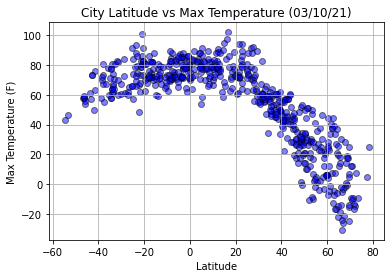

In [40]:
# scatter plot to show the relationships between latitude and temperature
plt.scatter(latitudes, 
            max_temps,
            facecolor="blue", 
            edgecolor = "black", 
            marker="o",
            linewidth=1,
            alpha = 0.5)
# set the title 
plt.title("City Latitude vs Max Temperature (%s)" % time.strftime("%x"))

# set axis labels
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# set grid lines
plt.grid(True)

# save plot as png
plt.savefig("../output_data/max_temp_vs_lat.png")

# dipslay plot
plt.show()


## Latitude vs. Humidity Plot

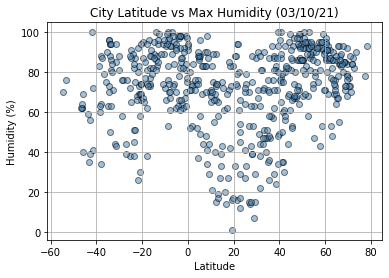

In [41]:
# scatter plot to show the relationships between latitude and humidity
plt.scatter(latitudes, 
            humidity,
            facecolor="steelblue", 
            edgecolor = "black", 
            marker="o",
            linewidth=1,
            alpha = 0.5)
# set the title 
plt.title("City Latitude vs Max Humidity (%s)" % time.strftime("%x"))

# set axis labels
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# set grid lines
plt.grid(True)

# save plot as png
plt.savefig("../output_data/humidity_vs_lat.png")

# dipslay plot
plt.show()


## Latitude vs. Cloudiness Plot

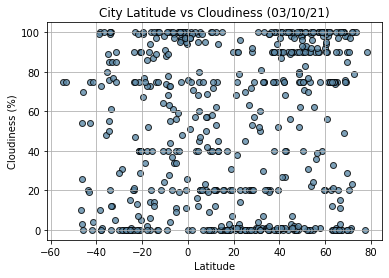

In [43]:
# scatter plot to show the relationships between latitude and cloudiness
plt.scatter(latitudes, 
            cloudiness,
            facecolor="#5d8aa8", 
            edgecolor = "black", 
            marker="o",
            linewidth=1,
            alpha = 0.8)
# set the title 
plt.title("City Latitude vs Cloudiness (%s)" % time.strftime("%x"))

# set axis labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# set grid lines
plt.grid(True)

# save plot as png
plt.savefig("../output_data/cloudiness_vs_lat.png")

# dipslay plot
plt.show()


## Latitude vs. Wind Speed Plot

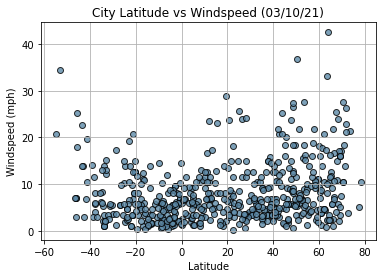

In [45]:
# scatter plot to show the relationships between latitude and cloudiness
plt.scatter(latitudes, 
            wind_speed,
            facecolor="#5d8aa8", 
            edgecolor = "black", 
            marker="o",
            linewidth=1,
            alpha = 0.8)
# set the title 
plt.title("City Latitude vs Windspeed (%s)" % time.strftime("%x"))

# set axis labels
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")

# set grid lines
plt.grid(True)

# save plot as png
plt.savefig("../output_data/cloudiness_vs_lat.png")

# dipslay plot
plt.show()

## Linear Regression

In [72]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

In [73]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = cities_weather_data.loc[cities_weather_data["Lat"] >= 0]
southern_hemisphere_df = cities_weather_data.loc[cities_weather_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.88


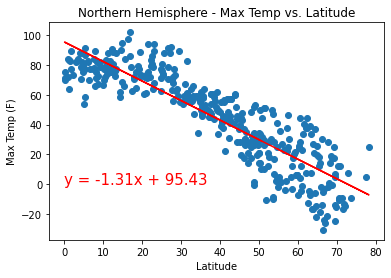

In [77]:
# Call the function defined above and save into variable eqn
eqn = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call the annotate function and set the intercept cordinates for regression line
annotate(eqn, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the plot
plt.savefig("../output_data/NH - Max_Temp vs. Lat Lin Regress.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.49


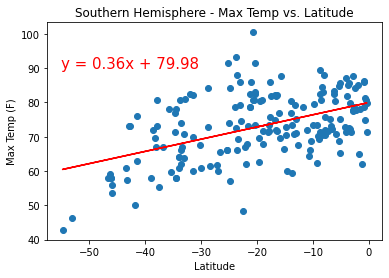

In [78]:
# Call the function defined above and save into variable eqn
eqn = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])

# Call the annotate function and set intercept cordinates for regression line
annotate(eqn, -55, 90)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# save plot
plt.savefig("../output_data/SH-lin_regress_max_temp_vs_lat.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.35


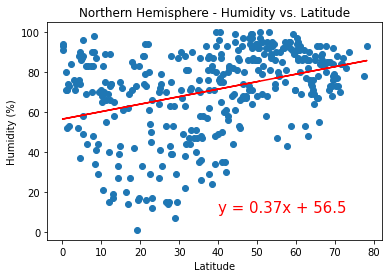

In [79]:
# Call the function defined above and save into variable eqn
eqn = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call the annotate function and set intercept cordinates for regression line
annotate(eqn, 40, 10)

# Set a title
plt.title("Northern Hemisphere - Humidity vs. Latitude")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/NH - Humidity vs. Lat Lin Regress.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.34


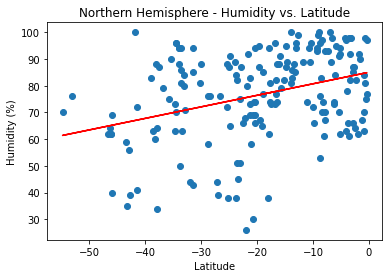

In [81]:
# Call the function defined above and save into variable eqn
eqn = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call the annotate function and set intercept cordinates for regression line
annotate(eqn, -50, 20)

# Set a title
plt.title("Southern Hemisphere - Humidity vs. Latitude")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/SH - Humidity vs. Lat Lin Regress.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.2


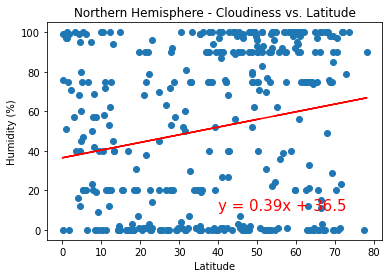

In [82]:
# Call the function defined above and save into variable eqn
eqn = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call the annotate function and set intercept cordinates for regression line
annotate(eqn, 40, 10)

# Set a title
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/NH - Cloudiness vs. Lat Lin Regress.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.27


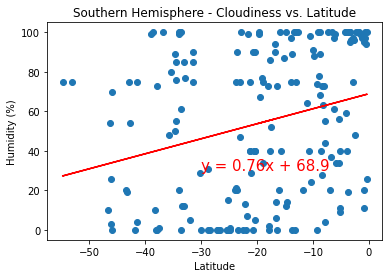

In [83]:
# Call the function defined above and save into variable eqn
eqn = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call the annotate function and set intercept cordinates for regression line
annotate(eqn, -30, 30)

# Set a title
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/SH - Cloudiness vs. Lat Lin Regress.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.24


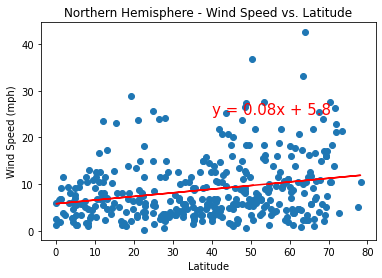

In [84]:
# Call the function defined above and save into variable eqn
eqn = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call the annotate function and set intercept cordinates for regression line
annotate(eqn, 40, 25)

# Set a title
plt.title("Northern Hemisphere - Wind Speed vs. Latitude")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../output_data/NH - Wind Speed vs. Lat Lin Regress.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.37


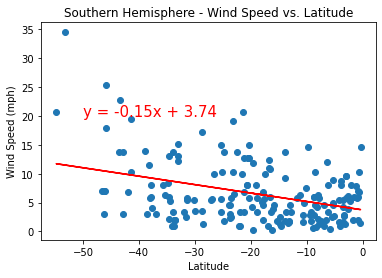

In [85]:
# Call the function defined above and save into variable eqn
eqn = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call the annotate function and set intercept cordinates for regression line
annotate(eqn, -50, 20)

# Set a title
plt.title("Southern Hemisphere - Wind Speed vs. Latitude")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../output_data/SH - Wind Speed vs. Lat Lin Regress.png")

### Analysis of R-Squared Values

The negative r-squared value indicates inverse relationship between the variables, whereas a positive r-squared value indicates a direct relationship between variables under consideration.
For r-squared values between 0 to 1, the higher the value, the closer the relationship between the variables and vise-versa. 

Considering the r-squared values for the Norhern and Southern Hemispheres where the variables are maximum temperature and latitude, a -0.88 for the Northern Hemisphere indicates a stonger inverse relationship between latitude and temperature. There is 88% likelyhood that a lower altitude will result in higher temperature. However, a +0.49 value for the southern hemisphere for same variables do not support the observation in the northern hemisphere.

The difference in hemispheres is not significant enough basis to make conclusive theory on weather conditions.